<br>

# NLP Application with ML

<br>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
#plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
2335,569256434736746496,negative,0.6452,Can't Tell,0.3441,United,NaN,9kenny5,NaN,0,"@united Such as deodorant, shampoo, toothpaste...",NaN,2015-02-21 14:04:44 -0800,England,London
13548,569835766416867328,negative,1.0000,Lost Luggage,0.6627,American,NaN,LeslieWolfson,NaN,0,"@AmericanAir 3days and no call,bag or anyone t...",NaN,2015-02-23 04:26:48 -0800,Miami Beach,Central Time (US & Canada)
6021,568432638823772160,negative,1.0000,Late Flight,1.0000,Southwest,NaN,itshosey,NaN,0,@SouthwestAir great. My flight is delayed thre...,NaN,2015-02-19 07:31:16 -0800,Los Angeles,Arizona
12434,570188405541175297,negative,1.0000,Customer Service Issue,1.0000,American,NaN,diegolrz,NaN,0,@AmericanAir are you a bot? Haha always same l...,NaN,2015-02-24 03:48:04 -0800,"Dallas, TX",Central Time (US & Canada)
2195,569319928815202304,negative,1.0000,Can't Tell,1.0000,United,NaN,JSJ35,NaN,0,@united you're terrible.,NaN,2015-02-21 18:17:03 -0800,Blue Area of the Moon,Eastern Time (US & Canada)


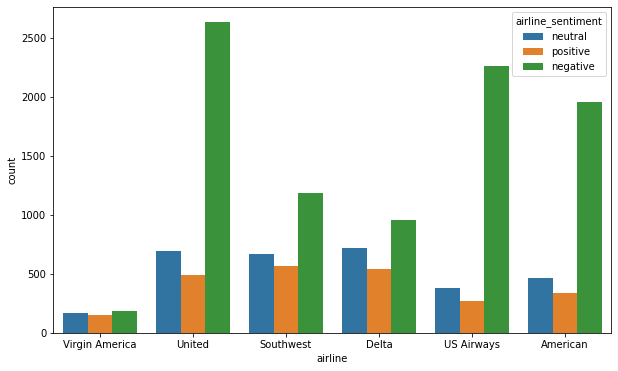

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'airline', hue = 'airline_sentiment');

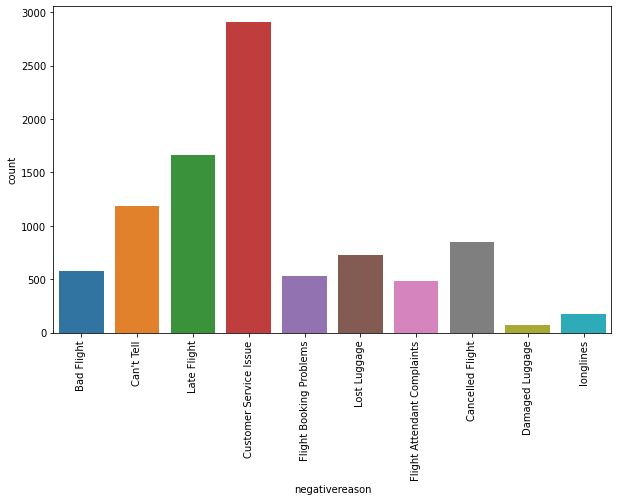

In [9]:
sns.countplot(data =df, x ="negativereason")
plt.xticks(rotation =90);

<br>

# Cleaning Data

In [18]:
df1 = df.copy()

In [19]:
df1["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [27]:
df1["text"] = df1["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))
df1["text"].head()

0                                          What  said.
1     plus you've added commercials to the experien...
2     I didn't today... Must mean I need to take an...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
Name: text, dtype: object

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gulfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gulfa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
stop_words = stopwords.words('english')

In [41]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [42]:
df1["text"] = df1["text"].apply(cleaning)
df1["text"].head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Removing Rare Words

In [ ]:
#" ".join(df1["text"]).split()

In [48]:
" ".join(df1.text).split()

['said',
 'plus',
 'youve',
 'added',
 'commercial',
 'experience',
 'tacky',
 'didnt',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guest',
 'face',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seat',
 'didnt',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hat',
 'parody',
 'http',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'youre',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teen',
 'lt',
 'pretty',
 'graphic',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'trip',
 'amp',
 'havent',
 'even',
 'gone',
 'trip',
 'yet',
 'p',
 'im',
 'flying',
 'fabulous',
 'seductiv

In [53]:
rare_words = pd.Series(" ".join(df1["text"]).split()).value_counts()
rare_words

flight                   4544
get                      1374
http                     1210
hour                     1138
thanks                   1078
                         ... 
outoftouchwithreality       1
balt                        1
spvsr                       1
custs                       1
crewe                       1
Length: 9881, dtype: int64

In [60]:
rare_words = rare_words[rare_words<3]

In [61]:
rare_words.index

Index(['hail', 'standbye', 'ooh', 'rollercoaster', 'engagement', 'chef',
       'outage', 'maine', 'trace', 'celebrates',
       ...
       'confuses', 'shavon', 'homeschool', 'pu', 'pale',
       'outoftouchwithreality', 'balt', 'spvsr', 'custs', 'crewe'],
      dtype='object', length=6155)

In [62]:
df1["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

0                                                     said
1                   plus youve added commercial experience
2             didnt today must mean need take another trip
3        really aggressive entertainment guest face amp...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [67]:
" ".join([i for i in (" ".join(df1.text).split()) if i not in rare_words.index]  )

'said plus youve added commercial experience didnt today must mean need take another trip really aggressive entertainment guest face amp little recourse really big bad thing seriously would pay flight seat didnt playing really bad thing flying va yes nearly every time fly vx go away really missed prime opportunity men without hat http well amazing arrived hour early youre good know suicide second leading cause death among teen lt pretty much better great deal already thinking trip amp havent even gone trip yet p im flying fabulous sky u take stress away travel http thanks schedule still mia excited first cross country flight lax mco ive heard nothing great thing virgin america flew nyc sfo last week couldnt fully sit seat due two large either side help flying know would awesome please want fly first fare may three time carrier seat available select love http love innovation feel good brand making bos gt la non stop anytime soon guy messed seating reserved seating friend guy gave seat a

In [65]:
" ".join(df1.text).split()

['said',
 'plus',
 'youve',
 'added',
 'commercial',
 'experience',
 'tacky',
 'didnt',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guest',
 'face',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seat',
 'didnt',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hat',
 'parody',
 'http',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'youre',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teen',
 'lt',
 'pretty',
 'graphic',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'trip',
 'amp',
 'havent',
 'even',
 'gone',
 'trip',
 'yet',
 'p',
 'im',
 'flying',
 'fabulous',
 'seductiv